# <span style="color:#8B0000;font-family:Papirus">Árboles y orden</span>

Vamos a utilizar árboles para:
- Resolver problemas de decisión.
- Elaborar un algoritmo de ordenación (*heapsort*).

El famoso algoritmo de ordenación usando *pilas* (o  *montones*) y los problemas de decisón, se modelan muy bien usando árboles dispuestos de una manera particular: **con raíz** (piensa en un [árbol genealógico](www.genealogy.math.ndsu.nodak.edu)).

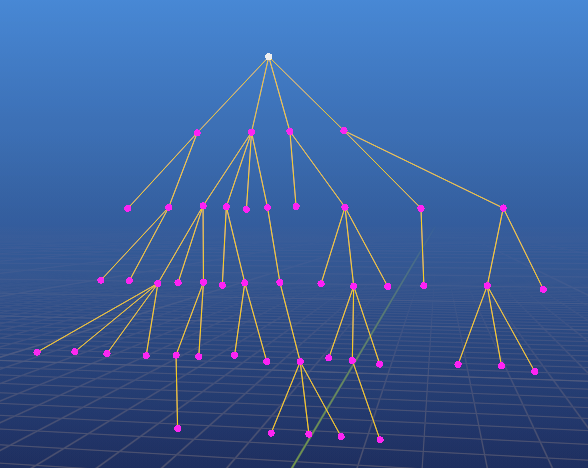

Dado un árbol $T$: 
1. Elige un vértice cualquiera $r$, llámalo **raíz** de $T$.
2. Define el **nivel $0$** de $T$ como el conjunto cuyo único elemento es $r$.
3. Para $j\geq 1$ define el nivel $j$ como el conjunto de los vecinos de los elementos del nivel $j - 1$ que no han sido utilizados.
4. La **altura** de $T$ es el máximo $j$ para el cual el nivel $j$ es no vacío. 

<span style="color:#8B0000;font-family:Papirus">**Observa</span>:** A partir de las definiciones dadas obtenemos:
1. Para $j\geq 1$ cada vértice $v$ en el nivel $j$ tiene un único vecino en el nivel $j - 1$. Ese vértice se llama el **padre** de $v$. 
2. Los vecinos de $v$ que están en el nivel $j + 1$ son los **hijos** de $v$.
3. Si un vértice no tiene hijos entonces es una hoja de $T$. El recíproco es cierto excepto quizás para la raíz de $T$ (el nivel $1$ podría tener sólo un elemento). 
4. La altura de $T$ es el máximo nivel en el cual hay una hoja de $T$.
5. Si cada vértice de $T$ tiene $m$ o ningún hijo, decimos que $T$ es **$m$-ario**.

Si $T$ es $m$-ario, tiene $n$ hojas y altura $h$, ¿cómo se relacionan $m$, $n$ y $h$? El caso extremo es si todos las hojas están en el nivel $h$. Es decir, todos los vértices de cada nivel $k < h$ tienen $m$ hijos. Por lo tanto la máxima cantidad de hojas es $m^h$. Esto es equivalente a: 

> <span style="color:#8B0000;font-family:Papirus">**Teorema:**</span> Un árbol $m$-ario con $n$ hojas tiene altura al menos $\log_m n$.

El **árbol de decisión** correspondiente al algoritmo burbuja para un conjunto de tres elementos $\alpha$, $\beta$, $\gamma$ queda así:

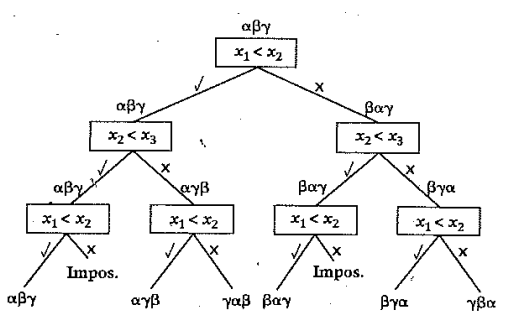

Este es un ejemplo de árbol **binario**. Las hojas corresponden a los resultados de la ordenación (en este caso, $3! = 6$) y algunos resultados *imposibles*. Para un conjunto con $n$ elementos, la cantidad de hojas es al menos $n!$, **independientemente del algoritmo**. La altura es la cantidad de comparaciones que se requieren, digamos $c(n)$. Por el Teorema anterior, $c(n)\geq \log_2(n!)$.  

Analicemos la eficiencia a partir de aquí:
1. $\log_2(n!) = \log_2 1 + \log_2 2 + \log_2 3 + \cdots + \log_2(n - 1) + \log_2 n\leq n\log_2 n$.
2. Además, $\frac{1}{2}n\log_2 n\leq \log_2(n!)\leq n\log_2 n$.
3. Por lo tanto, cualquier algoritmo para ordenar es al menos $O(n\log n)$.

Ya vimos que el algoritmo de inserción (con el método de bisección) es $O(n^2)$, igual que el de la burbuja. El siguiente algoritmo (heapsort) es mejor. Comprende dos etapas: primero distribuir el conjunto dado en una **pila** (o montón) usando un árbol binario y luego modificar la pila para que quede finalmente ordenado.

¿Qué entendemos por *pila* en este contexto? Dado el conjunto de datos a ordenar $x_1$, $x_2$, $x_3$, $\dots$, $x_n$:
1. Coloca en la raíz del arbol "binario" a $x_1$.
2. En el nivel $1$, coloca $x_1$ y $x_2$.
3. En el nivel $2$, coloca $x_3$, $x_4$, $\dots$, $x_8$.
4. Así sucesivamente, hasta agotar el conjunto.
5. Entonces si $2r + 1\leq n$, $x_r$ es el padre de $x_{2r}$ y $x_{2r + 1}$.
6. Si $n$ es par, $x_{n/2}$ tiene como único hijo a $x_n$.
6. Una **pila** es una manera de distribuir los datos en el árbol de manera que cada padre es menor que sus dos hijos (si tiene).

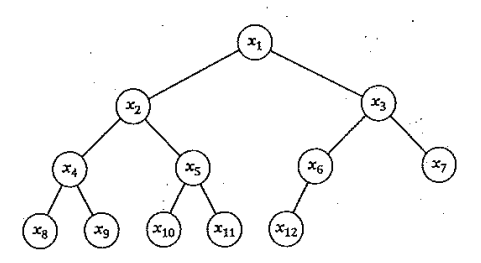

¿Cómo convertir el conjunto ya en el árbol, en una pila?
1. Trabajamos con los padres de abajo hacia arriba, de derecha a izquierda.
2. Supongamos que los subárboles con raíces $x_{2r}$ y $x_{2r + 1}$ ya son pilas.
3. Si $x_r$ es menor que sus hijos, continuar.
4. En caso contrario, guarda $x_r$ temporalmente y coloca el menor de los hijos en su lugar.
5. Si $x_r$ es menor que los hijos del lugar que quedó vacío en el paso anterior, o no hay hijos; coloca allí a $x_r$.
6. En caso contrario, coloca en el lugar vacío al menor de los hijos de ese lugar.
7. Hallaremos un lugar para $x_r$ a más tardar, cuando alcancemos una hoja.
8. Continúa con el siguiente padre.

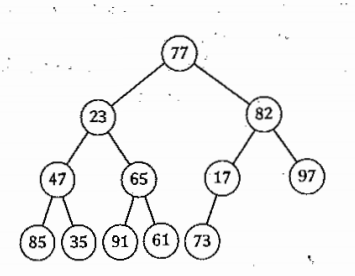

LLama al procedimiento anteriór `pila(r, n)`. Al aplicarlo, si los subárboles con raíces $x_{2r}$ y $x_{2r + 1}$ ya son pilas, convierte el subárbol con raíz $x_r$ en una pila.

¿Cómo pasar de la pila al conjunto ordenado? Usamos el procedimiento `pila`:
1. En $x_1$ está el menor de los datos. Quítalo del árbol y llámalo $y_1$.
2. En el lugar que quedó del paso anterior coloca el dato de $x_n$ y elimina ese vértice.
3. Aplica `pila(1, n - 1)` para obtener una nueva pila con $n - 1$ vértices.
4. Ahora la raíz tiene el siguiente menor dato, llámalo $y_2$ y quítalo.
5. En el lugar que quedó del paso anterior coloca el dato de $x_{n - 1}$ y elimina ese vértice.
6. Aplica `pila(1, n - 2)` para obtener una nueva pila con $n - 2$ vértices.
7. Así, hasta tener el conjunto ordenado $y_1$, $y_2$, $y_3$, $\dots$, $y_n$.